### Обучение с учителем: качество модели

#### Предварительная настройка

In [1]:
!pip install phik

     |████████████████████████████████| 677 kB 2.8 MB/s eta 0:00:01


In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 13.5 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 307 kB 40.6 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [3]:
#импорты
!pip install seaborn==0.13.2 matplotlib==3.8.4 scikit-learn==1.6.1 numpy==1.22.4

import pandas as pd
import warnings
warnings.simplefilter("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


import phik
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
!pip install shap
import shap

     |████████████████████████████████| 294 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 20.3 MB/s eta 0:00:01
     |████████████████████████████████| 16.8 MB 50.1 MB/s eta 0:00:01
     |████████████████████████████████| 321 kB 66.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 85.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
     |████████████████████████████████| 997 kB 2.6 MB/s eta 0:00:01


#### Загрузка данных

In [4]:
#Загрузим датасеты
df_m_file = pd.read_csv('/datasets/market_file.csv', sep=',')
df_m_money = pd.read_csv('/datasets/market_money.csv', sep=',')
df_m_time = pd.read_csv('/datasets/market_time.csv', sep=',')
df_money = pd.read_csv('/datasets/money.csv', sep=';')

In [5]:
#выведем информацию по первому датасету
print(df_m_file.head(10))
print(df_m_file.info())

       id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   
5  215353                 Снизилась   стандартт                 да   
6  215354                 Снизилась   стандартт                 да   
7  215355                 Снизилась   стандартт                нет   
8  215356                 Снизилась   стандартт                 да   
9  215357                 Снизилась   стандартт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819            

In [6]:
#выведем информацию по второму датасету
print(df_m_money.head(10))
print(df_m_money.info())

       id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6
5  215349     предыдущий_месяц   5216.0
6  215350  препредыдущий_месяц   4826.0
7  215350        текущий_месяц   5058.4
8  215350     предыдущий_месяц   5457.5
9  215351        текущий_месяц   6610.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


In [7]:
#выведем информацию по третьему датасету
print(df_m_time.head(10))
print(df_m_time.info())


       id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13
5  215350  предыдцщий_месяц      8
6  215351     текущий_месяц     13
7  215351  предыдцщий_месяц     11
8  215352     текущий_месяц     11
9  215352  предыдцщий_месяц      8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


In [8]:
#выведем информацию по четвертому датасету
print(df_money.head(10))
print(df_money.info())

       id Прибыль
0  215348    0,98
1  215349    4,16
2  215350    3,13
3  215351    4,87
4  215352    4,21
5  215353    3,95
6  215354    3,62
7  215355    5,26
8  215356    4,93
9  215357    4,66
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB
None


Датасеты подгрузились. Пропусков нет. 

Комментарий студента  

#### Предобработка данных

In [9]:
#проверим на наличие дубликатов
print(df_m_file.duplicated().sum())
print(df_m_money.duplicated().sum())
print(df_m_time.duplicated().sum())
print(df_money.duplicated().sum())

0
0
0
0


Явных дубликатов не обнаружено

In [10]:
#Приведем прибыль в числовой вид и заменим разделитель
df_money['Прибыль'] = df_money['Прибыль'].str.replace(',', '.').astype('float64')

In [11]:
#Проверим неявные дубликаты
# Создаем словарь для хранения имен датафреймов
dataframes = {
    'df_m_file': df_m_file,
    'df_m_money': df_m_money,
    'df_m_time': df_m_time,
    'df_money': df_money
}

# Перебираем все датафреймы
for name, df in dataframes.items():
    print(f"Информация по датафрейму '{name}':\n")
    
    # Находим категориальные столбцы
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Проверяем, есть ли категориальные столбцы
    if not categorical_cols.empty:
        for col in categorical_cols:
            unique_vals = df[col].unique()
            print(f"Уникальные значения для столбца '{col}':")
            print(unique_vals)
            print()  # Добавляем пустую строку для разделения
    else:
        print("В датафрейме нет категориальных столбцов (тип 'object')")
    
    print("-" * 50)  # Разделитель между датафреймами

Информация по датафрейму 'df_m_file':

Уникальные значения для столбца 'Покупательская активность':
['Снизилась' 'Прежний уровень']

Уникальные значения для столбца 'Тип сервиса':
['премиум' 'стандартт' 'стандарт']

Уникальные значения для столбца 'Разрешить сообщать':
['да' 'нет']

Уникальные значения для столбца 'Популярная_категория':
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

--------------------------------------------------
Информация по датафрейму 'df_m_money':

Уникальные значения для столбца 'Период':
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

--------------------------------------------------
Информация по датафрейму 'df_m_time':

Уникальные значения для столбца 'Период':
['текущий_месяц' 'предыдцщий_месяц']

--------------------------------------------------
Информация по датафрейму 'df_money':

В датафрейме нет категориальных столбцов (тип 'obj

 - в столбце Тип сервиса ошибка -  'стандартт' 'стандарт'
 - в столбце Период датафрейма df_m_time опечатка - 'предыдцщий_месяц'

In [12]:
df_m_file['Тип сервиса'] = df_m_file['Тип сервиса'].str.replace('стандартт', 'стандарт')
df_m_time['Период'] = df_m_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

In [13]:
# Создаем словарь для хранения имен датафреймов
dataframes = {
    'df_m_file': df_m_file,
    'df_m_money': df_m_money,
    'df_m_time': df_m_time,
    'df_money': df_money
}

# Перебираем все датафреймы
for name, df in dataframes.items():
    print(f"Информация по датафрейму '{name}':\n")
    
    # Находим категориальные столбцы
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Проверяем, есть ли категориальные столбцы
    if not categorical_cols.empty:
        for col in categorical_cols:
            unique_vals = df[col].unique()
            print(f"Уникальные значения для столбца '{col}':")
            print(unique_vals)
            print()  # Добавляем пустую строку для разделения
    else:
        print("В датафрейме нет категориальных столбцов (тип 'object')")
    
    print("-" * 50)  # Разделитель между датафреймами

Информация по датафрейму 'df_m_file':

Уникальные значения для столбца 'Покупательская активность':
['Снизилась' 'Прежний уровень']

Уникальные значения для столбца 'Тип сервиса':
['премиум' 'стандарт']

Уникальные значения для столбца 'Разрешить сообщать':
['да' 'нет']

Уникальные значения для столбца 'Популярная_категория':
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

--------------------------------------------------
Информация по датафрейму 'df_m_money':

Уникальные значения для столбца 'Период':
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

--------------------------------------------------
Информация по датафрейму 'df_m_time':

Уникальные значения для столбца 'Период':
['текущий_месяц' 'предыдущий_месяц']

--------------------------------------------------
Информация по датафрейму 'df_money':

В датафрейме нет категориальных столбцов (тип 'object')
------

Исправлены ошибки, которые были описаны на строчку выше

#### Исследовательский анализ данных

In [14]:
# Словарь с датафреймами для удобного доступа
dataframes = {
    'df_m_file': df_m_file,
    'df_m_money': df_m_money,
    'df_m_time': df_m_time,
    'df_money': df_money
}

for name, df in dataframes.items():
    print(f"\n{'='*50}")
    print(f"Анализ датафрейма: {name}")
    print(f"{'='*50}\n")
    
    # Выбираем числовые столбцы, исключая 'id'
    numeric_cols = [
        col for col in df.select_dtypes(include=['float64', 'int64']).columns
        if col != 'id'
    ]
    
    if numeric_cols:
        print("Описательная статистика числовых столбцов:")
        display(df[numeric_cols].describe().round(2))  # Округляем для читаемости
    else:
        print("В датафрейме нет числовых столбцов (кроме 'id')")
    
    print("\n" + "-"*50)


Анализ датафрейма: df_m_file

Описательная статистика числовых столбцов:


,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00,1300.00
mean,4.25,4.01,601.90,0.32,3.27,2.84,4.19,8.18
std,1.01,0.70,249.86,0.25,1.36,1.97,1.96,3.98
min,0.90,3.00,110.00,0.00,1.00,0.00,0.00,1.00
25%,3.70,4.00,405.50,0.17,2.00,1.00,3.00,5.00
50%,4.20,4.00,606.00,0.24,3.00,3.00,4.00,8.00
75%,4.90,4.00,806.00,0.30,4.00,4.00,6.00,11.00
max,6.60,5.00,1079.00,0.99,6.00,10.00,9.00,20.00



--------------------------------------------------

Анализ датафрейма: df_m_money

Описательная статистика числовых столбцов:


,Выручка
count,3900.00
mean,5025.70
std,1777.70
min,0.00
25%,4590.15
50%,4957.50
75%,5363.00
max,106862.20



--------------------------------------------------

Анализ датафрейма: df_m_time

Описательная статистика числовых столбцов:


,минут
count,2600.00
mean,13.34
std,4.08
min,4.00
25%,10.00
50%,13.00
75%,16.00
max,23.00



--------------------------------------------------

Анализ датафрейма: df_money

Описательная статистика числовых столбцов:


,Прибыль
count,1300.00
mean,4.00
std,1.01
min,0.86
25%,3.30
50%,4.04
75%,4.67
max,7.43



--------------------------------------------------



Визуализация числовых переменных для датафрейма: df_m_file


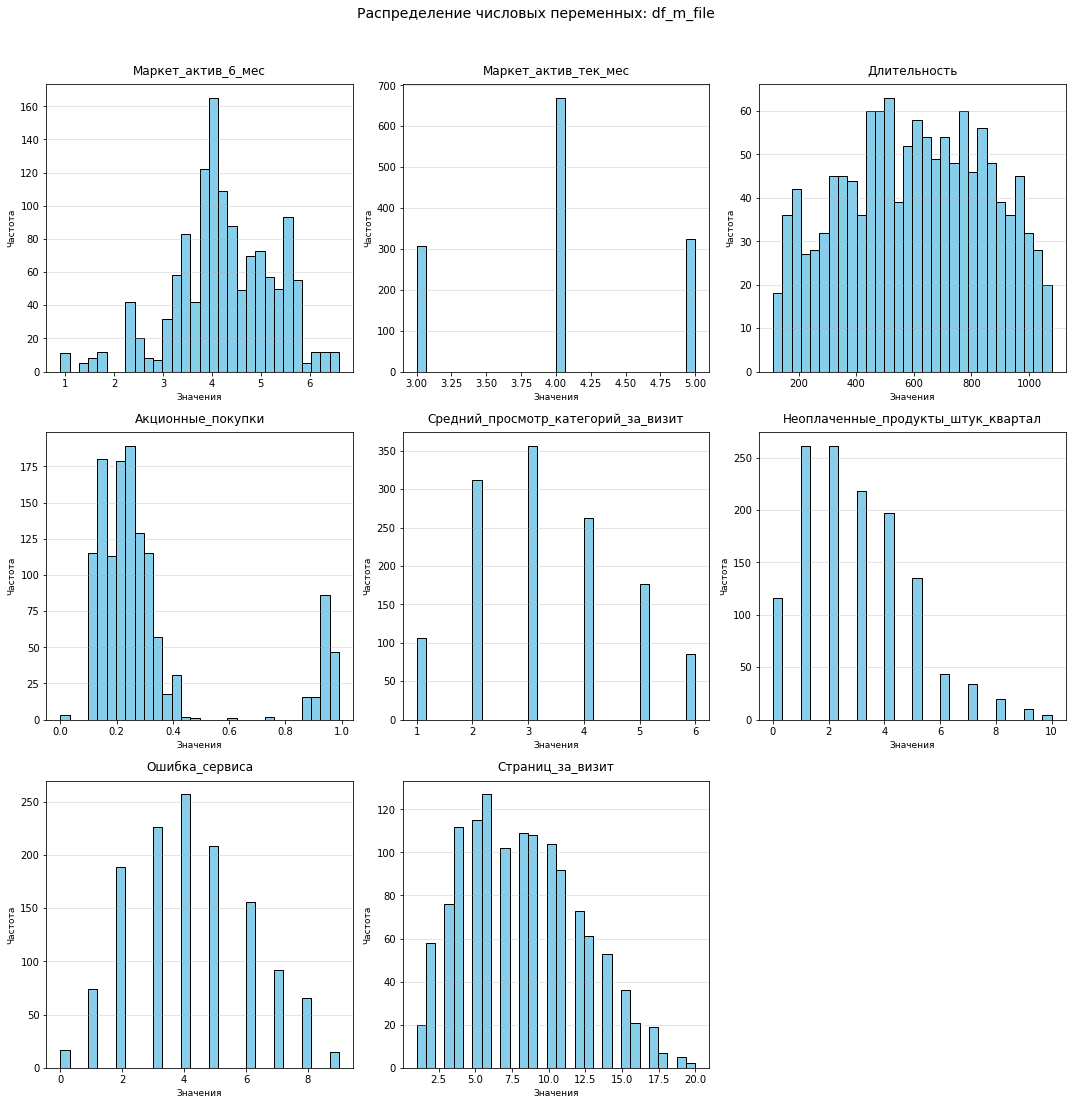


Визуализация числовых переменных для датафрейма: df_m_money


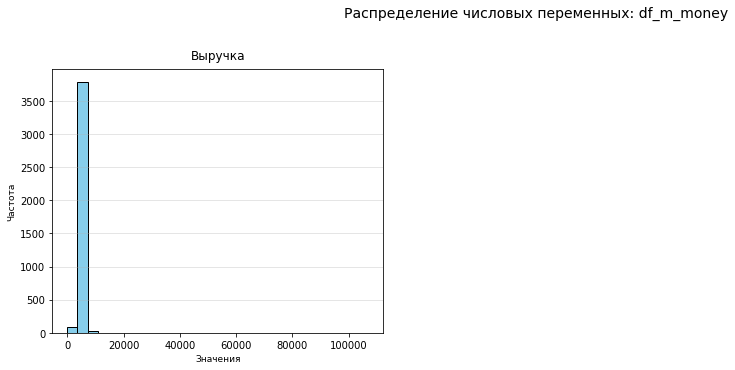


Визуализация числовых переменных для датафрейма: df_m_time


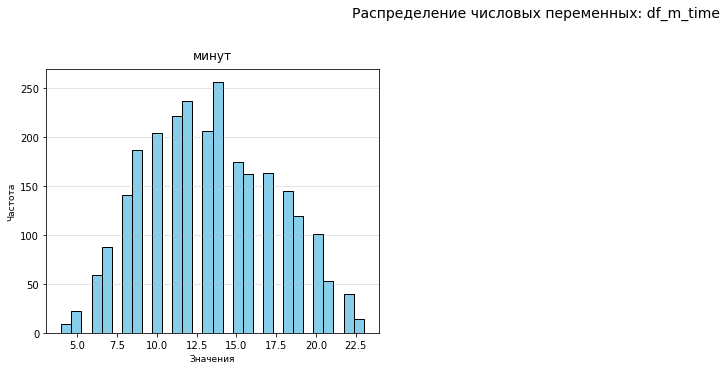


Визуализация числовых переменных для датафрейма: df_money


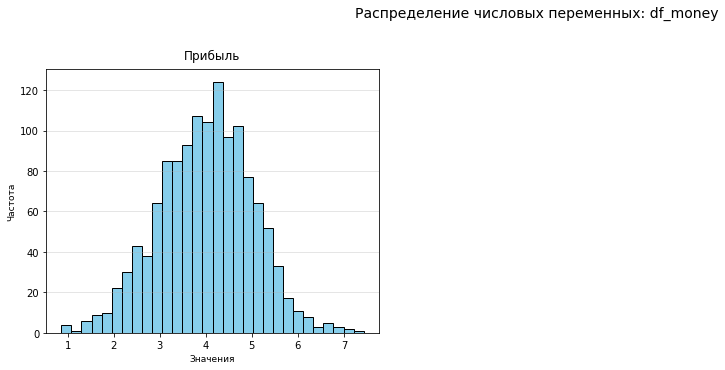

In [15]:

# Настройка стиля графиков

plt.rcParams['figure.facecolor'] = 'white'

for df_name, df in dataframes.items():
    # Получаем числовые столбцы, исключая 'id'
    numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']) 
                   if col != 'id']
    
    if not numeric_cols:
        print(f"\nВ датафрейме {df_name} нет числовых столбцов для визуализации")
        continue
    
    print(f"\nВизуализация числовых переменных для датафрейма: {df_name}")
    
    # Рассчитываем оптимальное количество строк и столбцов для subplot
    n_cols = 3
    n_rows = (len(numeric_cols) // n_cols + 1)
    
    # Создаем фигуру с динамическим размером
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle(f'Распределение числовых переменных: {df_name}', y=1.02, fontsize=14)
    
    # Выравниваем axes в плоский массив
    axes = axes.ravel()
    
    for i, col in enumerate(numeric_cols):
        # Строим гистограмму
        axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        
        # Настройка оформления
        axes[i].set_title(col, pad=10)
        axes[i].set_xlabel('Значения', fontsize=9)
        axes[i].set_ylabel('Частота', fontsize=9)
        axes[i].grid(axis='y', alpha=0.4)
    
    # Скрываем пустые subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

Графики наглядно демонстрируют распределения числовых признаков. На основании визуального анализа можно сделать следующие наблюдения:

Характер распределения:

Большая часть переменных демонстрирует распределение, близкое к нормальному

Некоторые признаки имеют распределение, характерное для закона Пуассона

Особенности данных:

Отдельные графики требуют дополнительного изучения, так как визуализируются нестандартно

Для более детального анализа этих признаков будут полезны box-plot диаграммы ("ящики с усами")

Box-plot позволят лучше оценить:

Центральные тенденции

Разброс значений

Наличие выбросов

Перспективы анализа:

Полученные распределения подтверждают применимость параметрических методов анализа

Особые случаи распределений потребуют дополнительного исследования

Box-plot действительно помогут уточнить природу нестандартных распределений

Таким образом, визуализация успешно выполнила свою задачу, выявив как основные закономерности, так и направления для углубленного изучения данных.

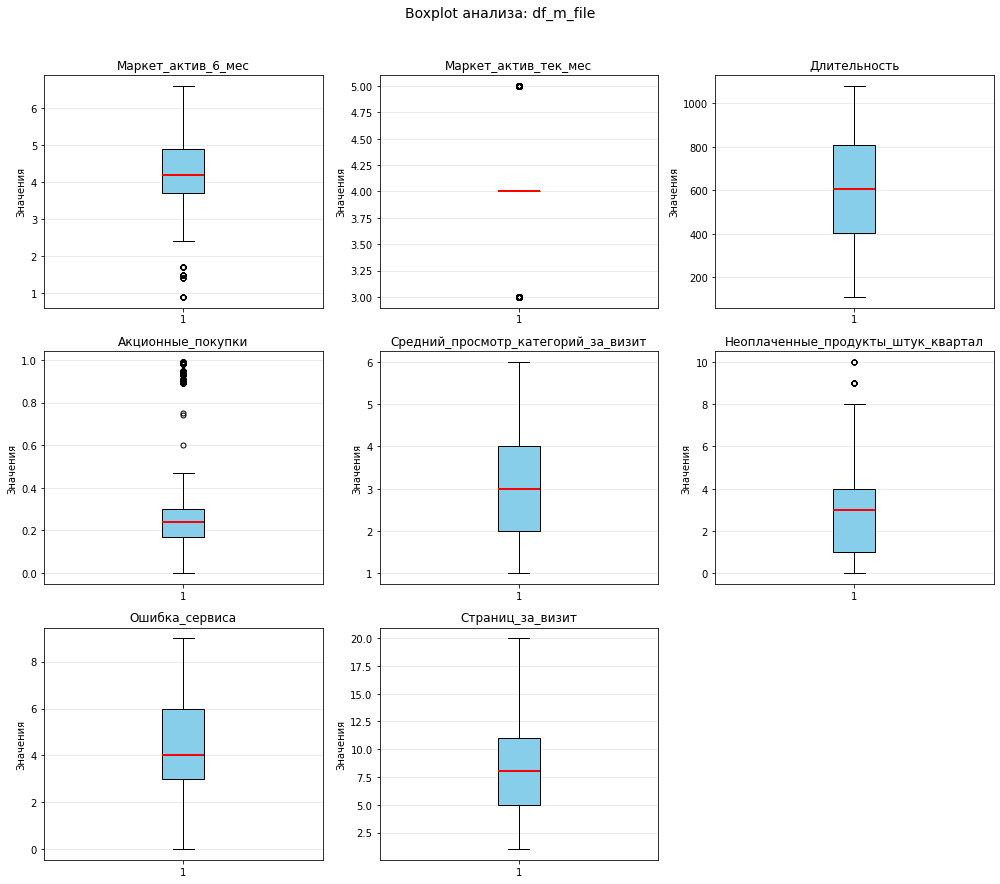

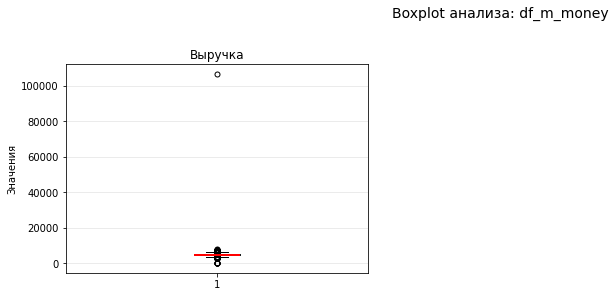

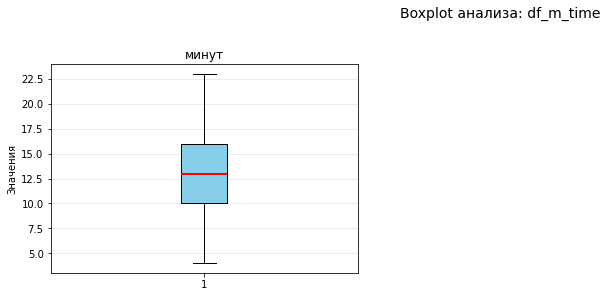

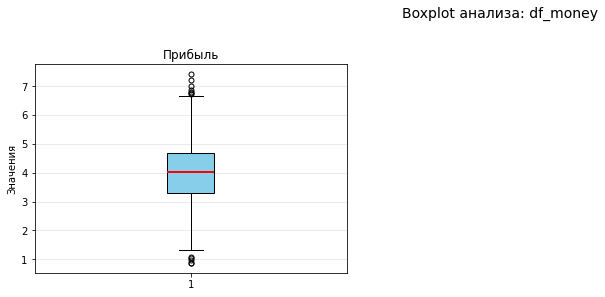

In [16]:
for df_name, df in dataframes.items():
    # Получаем числовые столбцы, исключая 'id'
    numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']) 
                   if col != 'id']
    
    if not numeric_cols:
        print(f"\nНет числовых столбцов в датафрейме {df_name}")
        continue
    
    # Рассчитываем количество строк и столбцов
    n_cols = 3
    n_rows = (len(numeric_cols) // n_cols) + 1
    
    # Создаем фигуру
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    fig.suptitle(f'Boxplot анализа: {df_name}', y=1.02, fontsize=14)
    
    # Обработка осей
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]  # если только один график
    
    for i, col in enumerate(numeric_cols):
        # Строим boxplot
        boxplot = axes[i].boxplot(df[col].dropna(),
                                patch_artist=True,
                                boxprops={'facecolor': 'skyblue', 'color': 'black'},
                                whiskerprops={'color': 'black'},
                                capprops={'color': 'black'},
                                medianprops={'color': 'red', 'linewidth': 2},
                                flierprops={'marker': 'o', 'markersize': 5})
        
        # Настройка оформления
        axes[i].set_title(col, fontsize=12)
        axes[i].set_ylabel('Значения', fontsize=10)
        axes[i].grid(axis='y', alpha=0.3)
    
    # Скрываем пустые subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

Удалим выброс в графике с выручкой и посмотрим результат

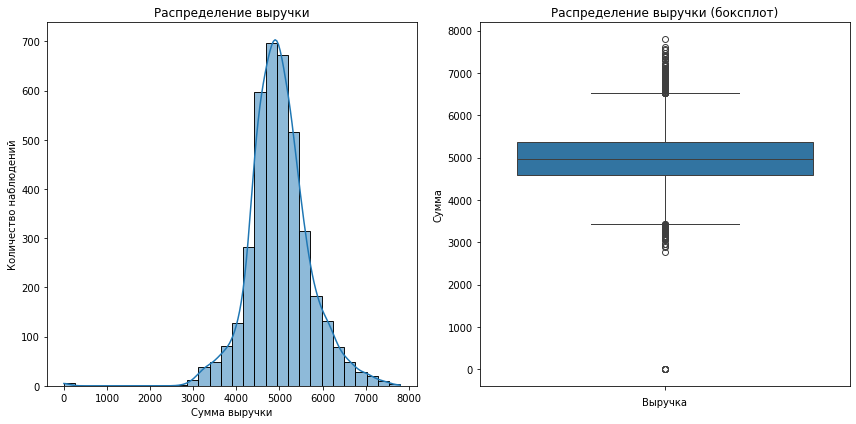

In [17]:
# Фильтрация данных
df_m_money = df_m_money.loc[df_m_money['Выручка'] < 20000]

# Создание фигуры с двумя подграфиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Гистограмма с seaborn
sns.histplot(data=df_m_money, x='Выручка', bins=30, ax=axes[0], kde=True)
axes[0].set_title('Распределение выручки')
axes[0].set_xlabel('Сумма выручки')
axes[0].set_ylabel('Количество наблюдений')

# Боксплот с seaborn
sns.boxplot(data=df_m_money, y='Выручка', ax=axes[1])
axes[1].set_title('Распределение выручки (боксплот)')
axes[1].set_xlabel('Выручка')
axes[1].set_ylabel('Сумма')

# Настройка отображения
plt.tight_layout()
plt.show()

Как видим, распределение выручки похоже на нормальное

Переходим к категориальным переменным

Круговые диаграммы для всех категориальных переменных:


Анализ категориальных переменных для: df_m_file


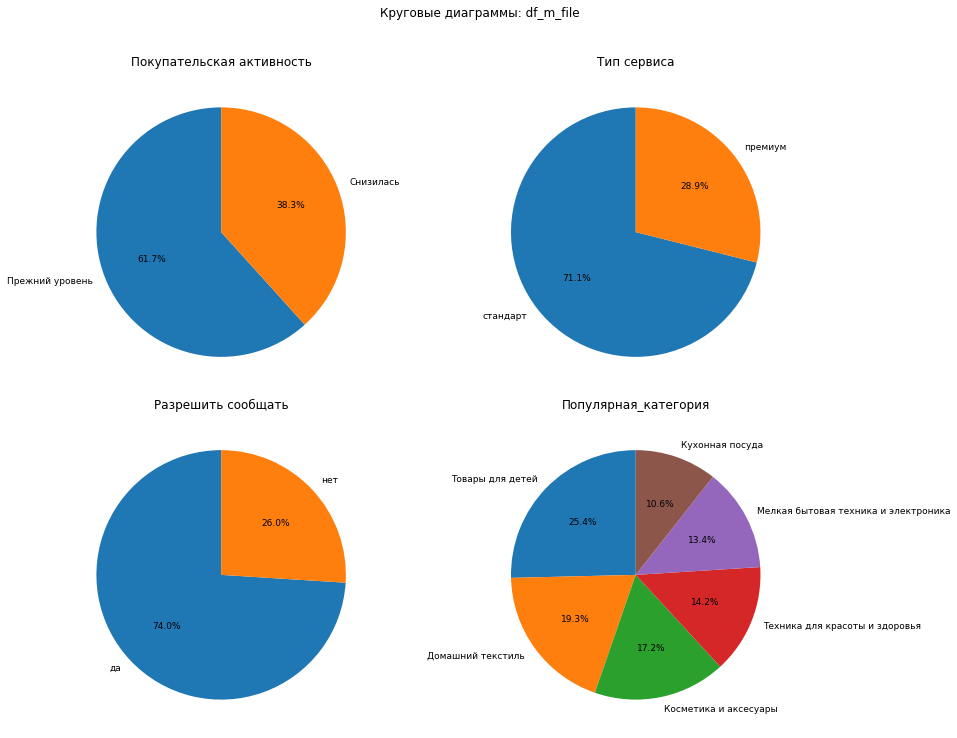


Анализ категориальных переменных для: df_m_money


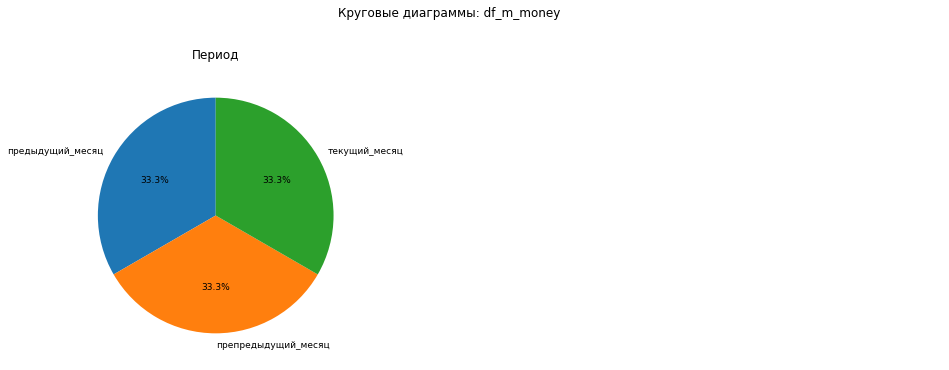


Анализ категориальных переменных для: df_m_time


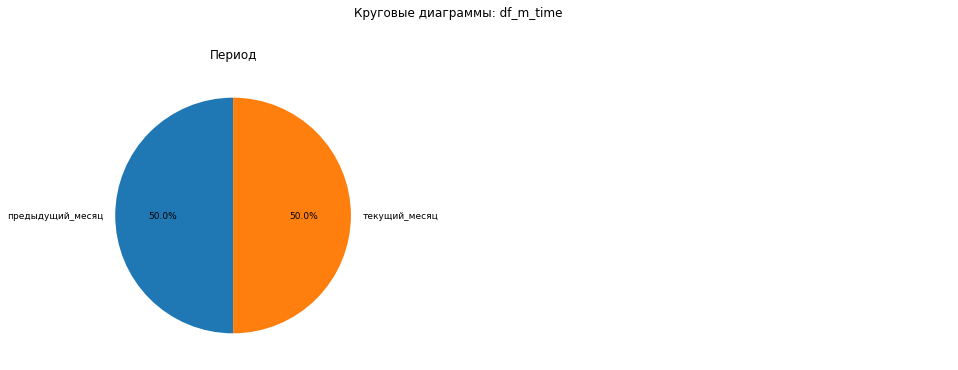

В датафрейме df_money нет категориальных столбцов


In [18]:
print('Круговые диаграммы для всех категориальных переменных:\n')

# Цикл по каждому датафрейму в словаре
for df_name, df in dataframes.items():
    # Получаем категориальные столбцы
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    if not categorical_columns:
        print(f"В датафрейме {df_name} нет категориальных столбцов")
        continue
    
    print(f"\nАнализ категориальных переменных для: {df_name}")
    
    # Рассчитываем количество строк и столбцов для subplot
    n_cols = 2
    n_rows = (len(categorical_columns) + 1) // n_cols  # Округление вверх
    
    # Создаем фигуру с динамическим размером
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
    fig.suptitle(f'Круговые диаграммы: {df_name}', y=1.02)
    
    # Выравниваем оси в плоский массив
    axes = axes.flatten()
    
    for i, column in enumerate(categorical_columns):
        # Получаем данные для диаграммы
        data = df[column].value_counts()
        
        # Строим круговую диаграмму
        axes[i].pie(data, 
                   labels=data.index,
                   autopct='%1.1f%%',
                   startangle=90,
                   textprops={'fontsize': 9})
        
        # Настройка заголовка
        axes[i].set_title(column, pad=10, fontsize=12)
    
    # Скрываем пустые subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

Как видим, данные распределены неарвномерно, кроме периода.
Так же видим, что в df_money нет категориальных признаков

Проверим наличие клиентов с нулевой покупкой и удалим такие id

In [19]:
# Поиск и обработка записей с нулевой выручкой
print("Записи с нулевой выручкой:")
zero_revenue = df_m_money[df_m_money['Выручка'] == 0]
display(zero_revenue)

# Получаем ID для удаления
id_to_drop = zero_revenue['id'].tolist()
print(f"\nНайдено записей с нулевой выручкой: {len(id_to_drop)}")
print(f"ID для исключения: {id_to_drop}")

# Удаляем записи с нулевой выручкой
initial_count = len(df_m_money)
df_m_money = df_m_money[df_m_money['Выручка'] > 0]
final_count = len(df_m_money)

# Выводим результат обработки
print(f"\nРезультат очистки:")
print(f"Изначальное количество записей: {initial_count}")
print(f"Удалено записей: {initial_count - final_count}")
print(f"Осталось записей: {final_count}")
print("\nРабота будет продолжена с очищенным датафреймом")

Записи с нулевой выручкой:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0



Найдено записей с нулевой выручкой: 6
ID для исключения: [215348, 215348, 215357, 215357, 215359, 215359]

Результат очистки:
Изначальное количество записей: 3899
Удалено записей: 6
Осталось записей: 3893

Работа будет продолжена с очищенным датафреймом


**Результаты исследовательского анализа данных:**

Мы выполнили комплексный статистический анализ всех переменных из четырех датафреймов, сопроводив его соответствующими визуализациями для каждого типа данных. В ходе анализа был идентифицирован и удален один экстремальный выброс, в то время как остальные аномальные значения были признаны несущественными и сохранены.

**Ключевые наблюдения:**

1. **Анализ количественных переменных:**
   - Гистограммы распределения показали, что большинство признаков имеют распределение, близкое к нормальному
   - Незначительная часть переменных демонстрирует распределение Пуассона
   - Полное исключение всех выбросов, отмеченных на box-plot диаграммах, привело бы к потере существенного объема данных

2. **Анализ категориальных переменных:**
   - Большинство категориальных признаков распределены равномерно
   - Некоторые категории имеют соотношение примерно 1:3, что требует особого внимания при дальнейшем анализе

3. **Очистка данных:**
   - Из датафреймов были исключены записи с нулевой выручкой за последние три месяца
   - Соответствующие пользователи будут полностью исключены из финального объединенного датафрейма

**Заключение:**
Проведенный анализ обеспечил глубокое понимание структуры данных и выявил особенности, которые будут учтены на следующих этапах работы. Принятые решения по обработке данных направлены на сохранение информативной ценности выборки при одновременном устранении явных аномалий.

#### Объединим таблицы

Объединим таблицы market_file.csv, market_money.csv, market_time.csv.  
Данные о прибыли из файла money.csv при моделировании нам не понадобятся. 

Преобразуем столбцы для вожности объекдинения

In [20]:
df_m_money = df_m_money.pivot(index='id', columns='Период', values='Выручка')

# Переименуйте столбцы(отсортированные по лексографическому порядку)
df_m_money.columns = sorted(['выручка_текущий_месяц', 'выручка_препредыдущий_месяц','выручка_предыдущий_месяц'])

# Выводим полученный DataFrame
df_m_money

,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


In [21]:
df_m_time = df_m_time.pivot(index='id', columns='Период', values='минут')

# Переименуйте столбцы(отсортированные по лексографическому порядку)
df_m_time.columns = sorted(['минуты_текущий_месяц','минуты_предыдущий_месяц'])

# Выводим полученный DataFrame
df_m_time

,минуты_предыдущий_месяц,минуты_текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


In [22]:
new_df = pd.merge(df_m_file,df_m_money,on = 'id', how = 'outer')
new_df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6


In [23]:
df = pd.merge(new_df,df_m_time,on = 'id', how = 'outer')
df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [24]:
id_to_drop = [215348, 215357, 215359]
df = df[~df['id'].isin(id_to_drop)]
#df = df.drop(columns=['index'])
df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [25]:
df.isna().sum().sum()

1

In [26]:
#удалим замеченный пропуск
(df.dropna()).isna().sum().sum()

0

#### Корреляционный анализ

проведем корреляционный анализ и сделаем выводы о мутиколлиниарности

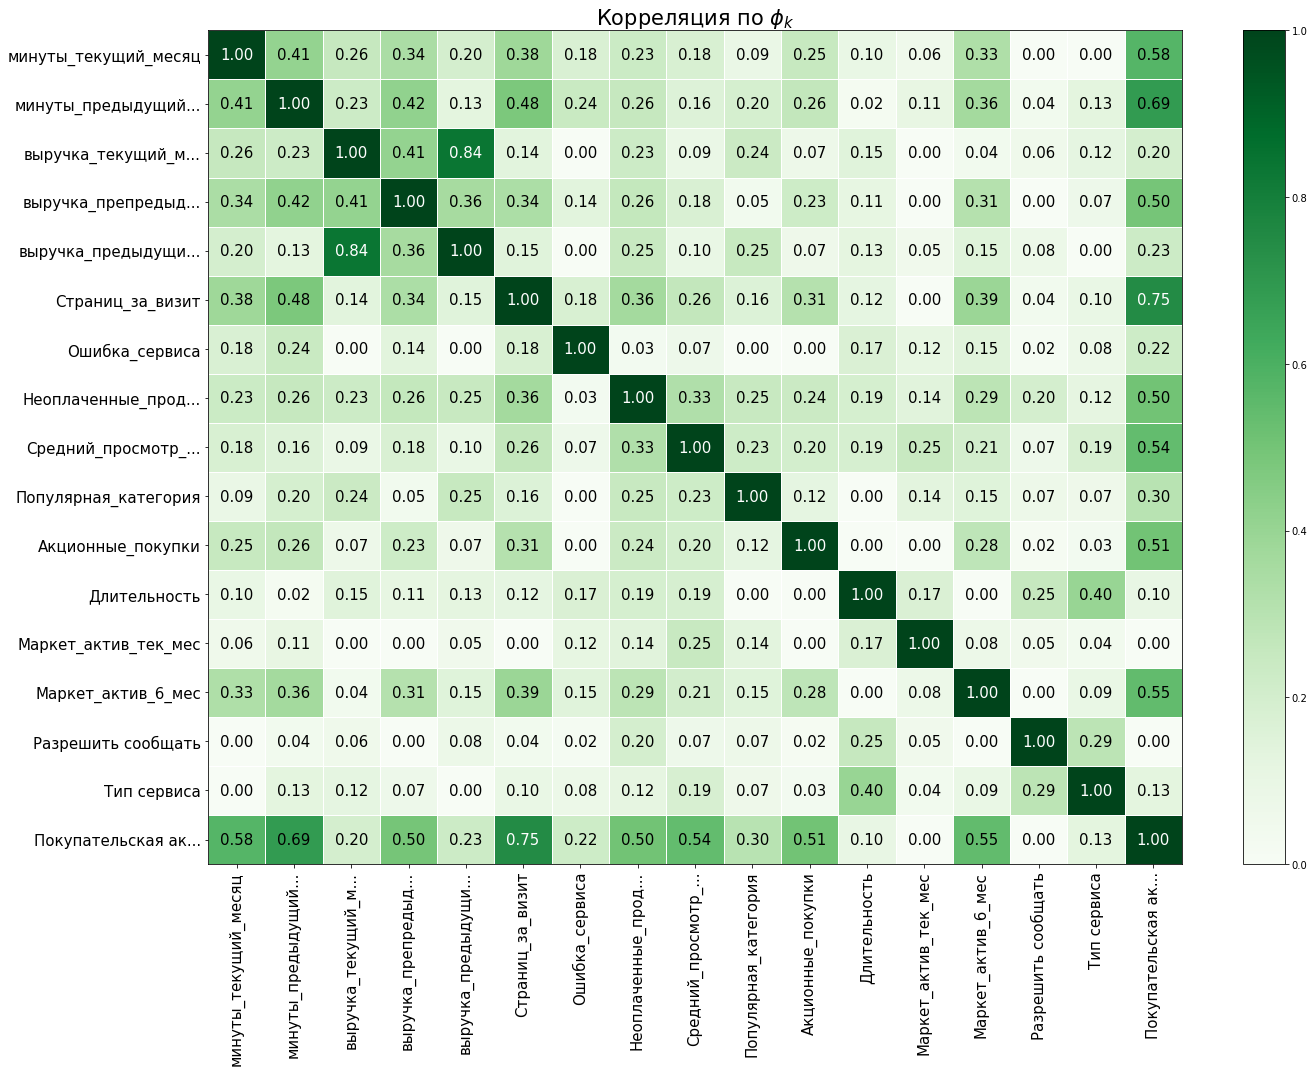

In [27]:
df_corr = df.drop(columns=['id'])
#соберем все численные переменные в датафрейме с помощью функции и сохраним их в переменную
num_columns = df_corr.select_dtypes(include=['float64','int64']).columns.tolist()

phik_matrix = df_corr.phik_matrix(interval_cols=num_columns)

#строим матрицу корреляции Phik
plot_correlation_matrix(phik_matrix.values, 
                       x_labels = phik_matrix.columns,
                       y_labels = phik_matrix.index,
                       vmin = 0, vmax = 1,color_map = 'Greens',
                       title = r'Корреляция по $\phi_k$',
                       fontsize_factor = 1.5, 
                       figsize = (20,15)
                       )

Мультиколлинеарность между входными признаками замечена не была

#### Использование пайплайнов

In [28]:
#для начала создадим списки для каждого кодирования

#для удобства выведем списки всех численных переменных, созданные ранее с помощью функции
num_columns 

['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'выручка_предыдущий_месяц',
 'выручка_препредыдущий_месяц',
 'выручка_текущий_месяц',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

In [29]:
# и так же варианты значения категориальных
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in cat_columns:
        unique_values = df[column].unique()
        print(f"Уникальные значения для столбца '{column}': {unique_values}")

Уникальные значения для столбца 'Покупательская активность': ['Снизилась' 'Прежний уровень']
Уникальные значения для столбца 'Тип сервиса': ['премиум' 'стандарт']
Уникальные значения для столбца 'Разрешить сообщать': ['да' 'нет']
Уникальные значения для столбца 'Популярная_категория': ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Кухонная посуда' 'Техника для красоты и здоровья'
 'Мелкая бытовая техника и электроника']


In [30]:
#введем сразу константы и разделим наш датафрейм на тестовую и тренировочную выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(
        [
            'Покупательская активность'
        ], 
        axis=1
    ),
    df['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская активность']
)


# признаки для OneHotEncoder
ohe_columns = ['Популярная_категория', 'Разрешить сообщать']

# признаки для OrdinalEncoder
ord_columns = ['Тип сервиса']

# как решили ранее, удалим данные о выручке
num_columns = ['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

In [31]:
X_testt = X_test.drop('id', axis = 1)
X_train = X_train.drop('id', axis = 1)

In [32]:
# cоздаём пайплайн для подготовки признаков из списка ohe_columns:
ohe_pipe = Pipeline([
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (    'ohe', 
            OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')
        )
])

In [33]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns:
ord_pipe = Pipeline([
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
       (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
])


# создайте общий пайплайн для объединения шагов подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)   
    ], 
    remainder =  'passthrough'
)
print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Популярная_категория',
                                  'Разрешить сообщать']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_f...
                                                 ('simpleImputer_after_ord',
                                              

In [34]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

создадим словари моделей

In [35]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE)],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability = True)],
        'models__kernel' : ('linear', 'rbf', 'sigmoid'),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [36]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [37]:
#обучим модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Популярная_категория',
                                                                                'Разрешить '
                                                                                'сообщать']),
                                                                              ('ord',
                                                                               Pipeli...
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ('linear', 'rbf',
                                                            'sigmoid'),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [38]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Популярная_категория',
                                                   'Разрешить сообщать']),
                                                 ('ord',
                                 

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

 - лучшей моделью у нас получилась модель Логистической регрессии. 
 - Лучшая метрика на тренировочной выборке показала значение 0.89. 

In [39]:
# проверим работу модели на тестовой выборке
y_test_pred = randomized_search.predict(X_testt)
y_test_pred
probabilities = randomized_search.predict_proba(X_testt)
probabilities_one = probabilities[:, 1]

In [40]:
#теперь обработаем столбцы с бинарными значениями
y_test_roc = y_test.map(lambda x: 1 if x == 'Снизилась' else 0).astype('int64')
y_test_roc.unique()

array([0, 1])

In [41]:
print(f'Метрика Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_pred)}')
print(f'Метрика Roc_auc на тестовой выборке: {roc_auc_score(y_test_roc, probabilities_one)}')

Метрика Accuracy на тестовой выборке: 0.8919753086419753
Метрика Roc_auc на тестовой выборке: 0.9146139222586256


Text(0.5, 15.0, 'Predicted')

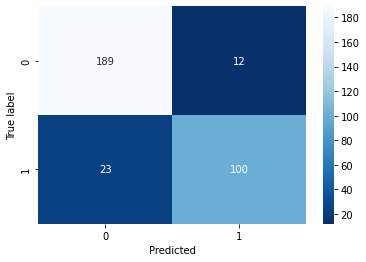

In [42]:
#выведем матрицу ошибок 

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

Вывод:  
 - лучшей моделью для решения нашей задачи классификации будет LogisticRegression с гиперпараметрами C=4, random_state = 42.    - Использование такой модели дает процент верно определенных параметров - 89

#### Анализ важности признаков

Оценим важность признаков

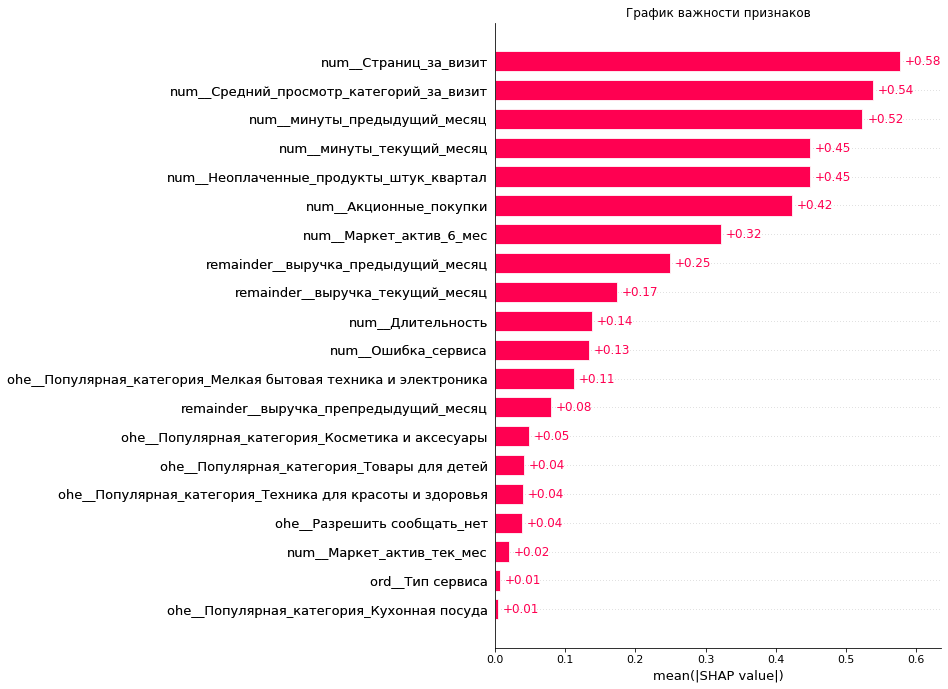

None

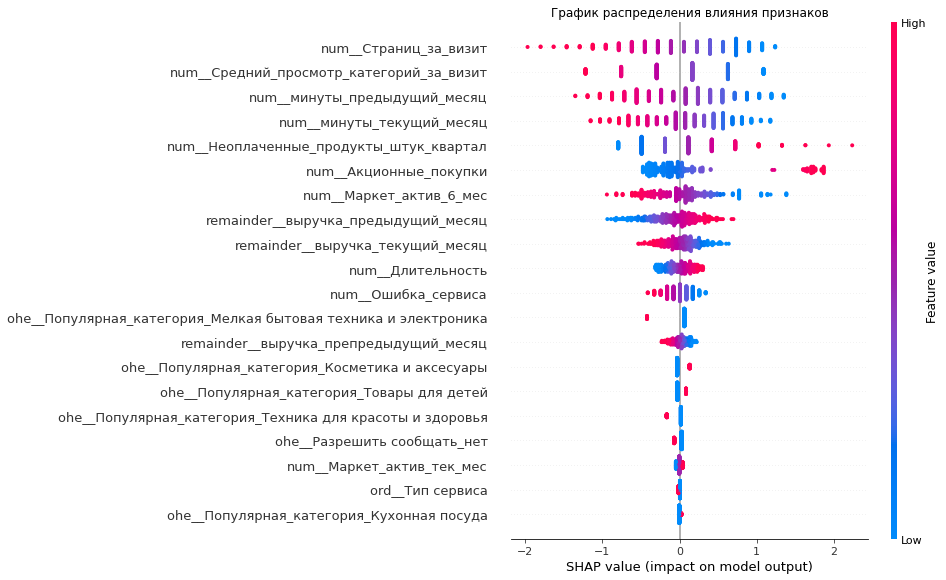

None

In [43]:
# Получаем препроцессор из лучшей модели
best_preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

# Преобразуем данные с помощью препроцессора из лучшей модели
X_train_new = best_preprocessor.fit_transform(X_train)
X_testt_new = best_preprocessor.transform(X_testt)

# Получаем имена признаков после преобразования
feature_names = best_preprocessor.get_feature_names_out()

# Создаем explainer на основе модели из лучшего estimator
explainer = shap.LinearExplainer(
    randomized_search.best_estimator_.named_steps['models'],
    X_train_new
)

# Преобразуем тестовые данные в DataFrame с правильными именами признаков
X_testt_new = pd.DataFrame(X_testt_new, columns=feature_names)

# Вычисляем SHAP значения
shap_values = explainer(X_testt_new)

# Строим графики
plt.title('График важности признаков')
display(shap.plots.bar(shap_values, max_display=30))

plt.title('График распределения влияния признаков')
display(shap.plots.beeswarm(shap_values, max_display=30))

Исправлено

На основании данных графиков мы можем оценить важность


**Ключевые наблюдения:**  
Анализ значимости признаков показал, что три фактора практически не влияют на модель:  
- Категория обслуживания (премиум/стандарт)  
- Число маркетинговых сообщений в текущем месяце  
- Популярность категории "Кухонная посуда".  
Их вклад минимален (∼0.1), что указывает на несущественность для прогнозирования.

**Сильнейшие предикторы:**  
Наибольшее воздействие оказывают:  
- Текущая и предыдущая месячная выручка (0.25 и 0.17).  
*Примечание:* Эти показатели исключены из финальной модели из-за риска утечки целевой переменной (покупательская активность напрямую связана с выручкой).

**Умеренно значимые факторы (0.11–0.14):**  
- Глубина просмотра (среднее число категорий/страниц за визит)  
- Объем акционных покупок  
- Минуты активности за прошлый месяц  
- Интерес к категории "Мелкая техника и электроника".

---

**Бизнес-импликации:**  
Для повышения конверсии рекомендуется фокусироваться на:  
1. **Усилении вовлеченности:**  
   - Рост числа просматриваемых категорий и страниц за сессию  
   - Внедрение интерактивных элементов для увеличения времени на сайте.  
2. **Стимулировании спроса:**  
   - Приоритизация акционных механик, особенно для категории электроники и техники  
   - Персонализация предложений для аудитории, интересующейся этими товарами.  
3. **Оптимизации пользовательского опыта:**  
   - Улучшение навигации и интерфейса платформы  
   - Создание "липких" решений, повышающих продолжительность сессий.  

**Комплексное предложение:**  
Разместить на главном экране блок с акционными товарами из категорий электроники и бытовой техники, сочетая это с улучшенным UX/UI-дизайном для естественного роста вовлеченности и времени пребывания пользователей.

#### Сегментация покупателей

выводы будем делать только по тестовой выборке,   
так как у нас уже имеется информация полученная методомpredict_proba() для X_testt

In [44]:
# предсказания полученные лучшей моделью
y_test_pred = randomized_search.predict(X_testt)

Исправлено

In [45]:
#добавим в тестовую выборки предсказания модели и вероятности получить класс снижения прибыли
X_test['Предсказания'] = y_test_pred
X_test['Вероятности'] = probabilities_one

#переведем столбец с предсказанными значениями в бинарный вид, где 1 - искомый признак "Снизилась"
X_test['Предсказания'] = X_test['Предсказания'].map(lambda x: 1 if x == 'Снизилась' else 0).astype('int64')
X_test['Предсказания'].unique()

array([0, 1])

In [46]:
#добавим в тестовую выборку данные о прибыли
X_test = pd.merge(X_test, df_money, on = 'id', how = 'left')
X_test

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,Предсказания,Вероятности,Прибыль
0,216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,0,0.011901,4.69
1,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,1,0.990273,2.75
2,216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11,0,0.058413,3.16
3,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,6604.0,4993.0,6758.7,9,9,1,0.826010,3.74
4,215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,5090.0,4451.0,5773.8,15,18,1,0.523646,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,215429,премиум,нет,0.9,4,690,0.24,Домашний текстиль,2,5,7,4,3662.0,4488.0,4158.6,11,10,1,0.944373,3.71
320,216233,премиум,да,3.9,4,1048,0.21,Техника для красоты и здоровья,3,0,6,14,4325.0,4553.0,4257.4,15,17,0,0.040918,4.62
321,215716,стандарт,да,2.4,4,952,0.30,Техника для красоты и здоровья,3,5,2,3,3067.0,4165.0,3343.9,13,14,1,0.864641,4.07
322,216141,стандарт,нет,4.0,4,748,0.28,Косметика и аксесуары,4,0,4,9,5660.5,4885.0,6462.6,14,10,0,0.186600,1.97


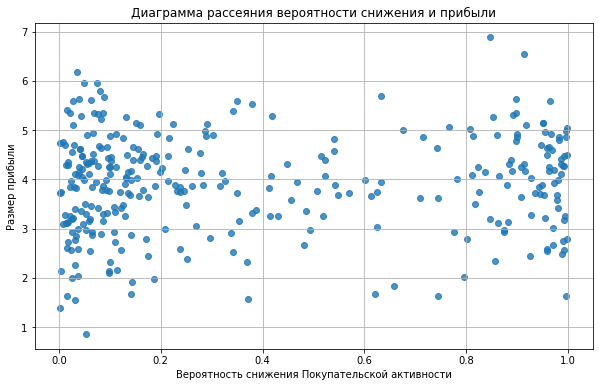

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Вероятности'], X_test['Прибыль'], alpha=0.8)
plt.title('Диаграмма рассеяния вероятности снижения и прибыли')
plt.xlabel('Вероятность снижения Покупательской активности')
plt.ylabel('Размер прибыли')
plt.grid(True)
plt.show()

Для рассмотрения хочу взять сегмент с пользователями, которые приносят высокую прибыль, но находятся в зоне риска возможного снижения активности.   Границами сегментов возьмем Прибыль > 4, а Вероятность > 0.6

In [48]:
# Фильтрация данных по условиям
df_segment = X_test[(X_test['Прибыль'] > 4) & (X_test['Вероятности'] > 0.6)]

# Вывод полученного сегмента
df_segment

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,Предсказания,Вероятности,Прибыль
12,215375,премиум,да,3.0,4,558,0.89,Товары для детей,3,3,7,4,5253.5,4715.0,5633.1,8,9,1,0.973414,4.18
18,215452,стандарт,да,3.8,4,756,0.90,Товары для детей,2,3,6,4,4045.0,4963.0,4206.2,11,10,1,0.959482,4.50
21,215484,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,5059.0,4267.0,5018.7,5,7,1,0.898339,5.64
38,215496,премиум,да,4.0,4,684,0.40,Техника для красоты и здоровья,1,6,2,4,5020.0,4896.0,5237.1,11,11,1,0.958938,4.64
47,215666,стандарт,да,3.5,5,703,0.22,Товары для детей,2,2,8,2,4945.0,4138.0,5150.4,6,10,1,0.927290,4.02
48,215737,стандарт,да,0.9,4,225,0.36,Косметика и аксесуары,2,4,2,3,5126.0,4679.0,5291.1,9,10,1,0.982122,4.80
52,215390,стандарт,да,3.1,4,152,0.33,Косметика и аксесуары,6,4,2,5,4254.0,4549.0,4612.8,8,12,1,0.632184,5.70
55,215604,стандарт,нет,3.1,5,458,0.99,Косметика и аксесуары,1,5,3,4,4449.0,4308.0,4459.4,8,10,1,0.996299,4.86
60,215628,стандарт,да,4.0,4,618,0.93,Товары для детей,3,5,2,2,3783.0,4566.0,3848.0,9,10,1,0.986707,4.11
62,215565,стандарт,нет,2.4,4,522,0.99,Кухонная посуда,2,5,4,4,4657.0,4492.0,5104.2,11,12,1,0.987146,4.32


In [49]:
#Графическое представление выбранного сегмента

In [50]:
df_segment = df_segment.drop(['id'], axis=1)

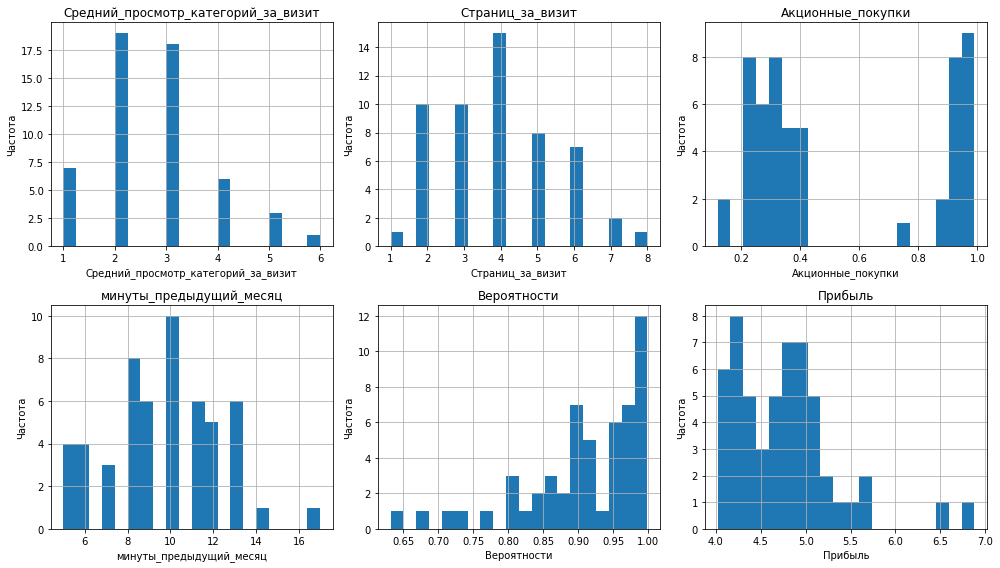

In [51]:
important_values = ['Средний_просмотр_категорий_за_визит', 
                    'Страниц_за_визит', 
                    'Акционные_покупки', 
                    'минуты_предыдущий_месяц',
                    'Популярная_категория', 
                    'Вероятности', 
                    'Прибыль']

df_segment_imp = df_segment[important_values]
num_columns = df_segment_imp.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(14, 8))
for i, column in enumerate(num_columns):
    # Создаем subplot для текущего столбца
        plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
        df_segment_imp[column].hist(bins=20)
    
    # Добавляем заголовок с названием столбца
        plt.title(column)
    
    # Добавляем метки для осей
        plt.xlabel(column)
        plt.ylabel('Частота')
        
plt.tight_layout()
plt.show()

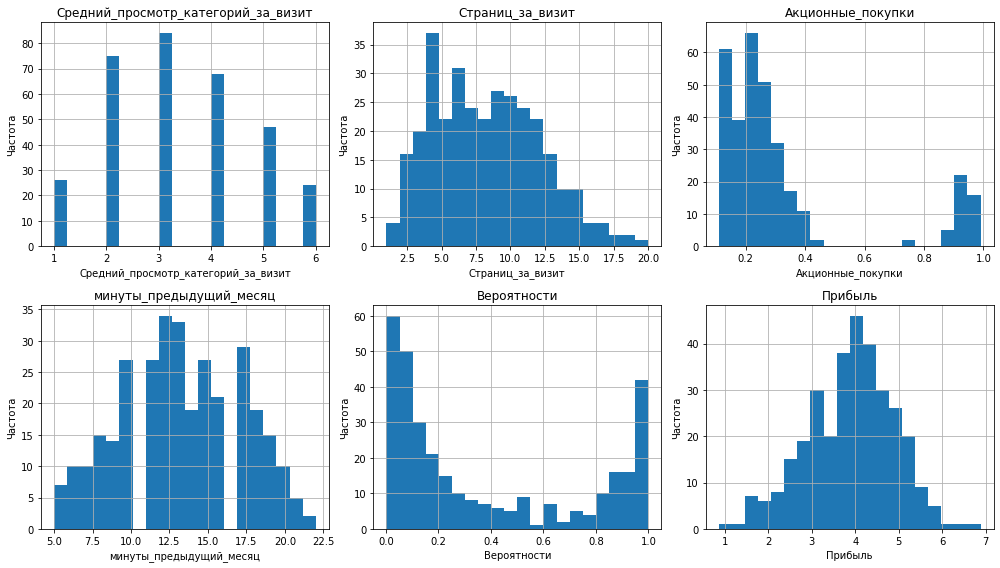

In [52]:
#выведем то же самое для общего датафрейма и сравним
X_test_imp = X_test[important_values]
num_columns = X_test_imp.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(14, 8))
for i, column in enumerate(num_columns):
    # Создаем subplot для текущего столбца
        plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
        X_test_imp[column].hist(bins=20)
    
    # Добавляем заголовок с названием столбца
        plt.title(column)
    
    # Добавляем метки для осей
        plt.xlabel(column)
        plt.ylabel('Частота')
        
plt.tight_layout()
plt.show()

В целом численные распределения имеют такой же вид, как и у общей выборки(за исключением Прибыли).   Также выведем информацию для всех категориальных признаков

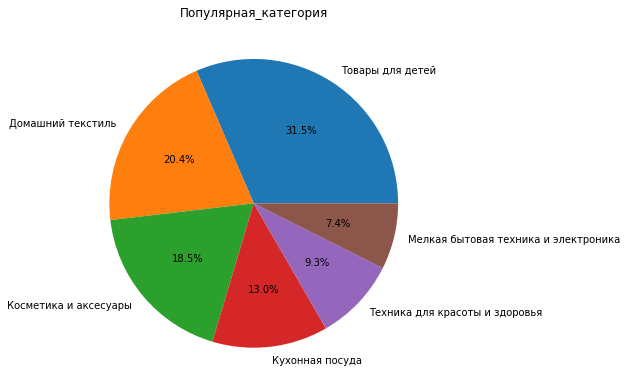

In [53]:
plt.figure(figsize=(14, 10))
    
# Получаем список категориальных столбцов для текущего датафрейма
categorical_columns = df_segment_imp.select_dtypes(include=['object']).columns.tolist()

# Цикл для итерации по каждому категориальному столбцу
for i, column in enumerate(categorical_columns):
        # Создаем subplot для текущего столбца
    plt.subplot(1, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
        # Подсчитываем количество каждого уникального значения в текущем столбце
    data = df_segment_imp[column].value_counts()
    
        # Строим круговую диаграмму для текущего столбца
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
        # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы для текущего датафрейма
plt.tight_layout()
plt.show()

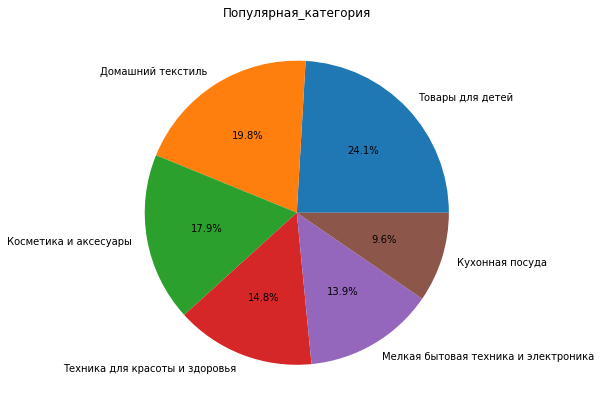

In [54]:
plt.figure(figsize=(14, 10))
    
# Получаем список категориальных столбцов для текущего датафрейма
categorical_columns = X_test_imp.select_dtypes(include=['object']).columns.tolist()

# Цикл для итерации по каждому категориальному столбцу
for i, column in enumerate(categorical_columns):
        # Создаем subplot для текущего столбца
    plt.subplot(1, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
        # Подсчитываем количество каждого уникального значения в текущем столбце
    data = X_test_imp[column].value_counts()
    
        # Строим круговую диаграмму для текущего столбца
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
        # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы для текущего датафрейма
plt.tight_layout()
plt.show()


**Сравнительный анализ сегмента:**
Изучение графиков выявило следующие особенности целевого сегмента относительно общей аудитории:
*   Глубина просмотра ниже (2 категории/визит против 3)
*   Выраженная склонность к покупке акционных товаров
*   Сниженная активность в предыдущем месяце (10 минут против 12)
*   Повышенный интерес к товарам для детей (доля на 7% выше среднего)

**Бизнес-предложение:**
Учитывая высокую зависимость целевого поведения (покупки) от времени на сайте и глубины просмотра, предлагается:
Разместить на главной странице специальный блок, акцентирующий **акционные предложения**, с визуальным выделением **товаров для детей**. Это привлечет внимание сегмента, известного интересом к скидкам и детским товарам. Посетители, углубляясь в изучение акционного ассортимента, естественным образом увеличат время сессии и число просмотренных страниц/категорий, что статистически повышает вероятность совершения покупки.

**Принципы сегментации и выбор фокуса:**
Тестовые данные были кластеризованы по двум осям:
1.  Динамика активности (снижение / сохранение)
2.  Уровень прибыльности (высокий / низкий)
Результирующие сегменты:
*   Снижение активности + Высокая прибыль
*   Снижение активности + Низкая прибыль
*   Сохранение активности + Высокая прибыль
*   Сохранение активности + Низкая прибыль

**Обоснование выбора сегмента:**
Для углубленного анализа был выбран сегмент **"Снижение активности при высокой исторической прибыльности"**. Это стратегически оправдано, так как:
1.  **Приоритетность:** Клиенты с высокой платежеспособностью и доказанной лояльностью (уже приносили значимую прибыль) представляют наибольшую ценность для удержания.
2.  **Потенциал:** Восстановление их активности прогнозируемо даст больший экономический эффект.
3.  **Уязвимость:** Риск потери таких клиентов из-за снижения вовлеченности требует проактивных мер.
4.  **Возможность:** Существующая история взаимодействия дает данные для персонализации реактивации.

Анализ паттернов поведения и категорийных предпочтений этого сегмента позволил разработать таргетированные меры по возвращению их активности и стимулированию покупок.


**Итоговые результаты проекта:**

**Цель исследования:**  
Разработка модели классификации для прогнозирования будущей покупательской активности клиентов на основе исторических данных о поведении, предпочтениях и финансовых показателях.

**Исходные данные:**  
Анализ проводился на 4 взаимосвязанных датасетах по 1300 уникальным пользователям каждый:
1. `market_file.csv` - действия пользователей на платформе  
2. `market_money.csv` - генерируемая выручка  
3. `market_time.csv` - длительность сессий  
4. `money.csv` - среднемесячная прибыль за квартал  
Данные не содержали пропусков или дубликатов, были предварительно очищены от опечаток и объединены в единый массив.

**Процесс моделирования:**  
Для решения задачи использован автоматизированный Pipeline, выполняющий:
- Предобработку данных  
- Поиск оптимальной модели машинного обучения  
- Подбор гиперпараметров  
- Оценку качества через кросс-валидацию

**Ключевые результаты:**  
1. **Лучшая модель:** Логистическая регрессия (`C=4`, `random_state=42`) с точностью **0.89** на тестовых данных. Выбор обусловлен природой задачи бинарной классификации и способностью модели оценивать вероятности принадлежности к классам.  
2. **Значимые предикторы:**  
   - Время, проведенное на сайте  
   - Глубина просмотра (страницы/категории за сессию)  
   - Интерес к категории "Бытовая техника и электроника"  
3. **Сегментный анализ:**  
   Пользователи разделены на 4 группы по критериям:  
   - Динамика активности (снижение/стабильность)  
   - Уровень прибыльности (высокий/низкий)  
   *Фокус исследования:* сегмент **"Снижение активности при высокой прибыльности"** как наиболее ценный для бизнеса.  
4. **Бизнес-рекомендация:**  
   Для реактивации целевого сегмента предложено разместить на главной странице акционный блок с выделением товаров для детей. Это учитывает:  
   - Повышенный интерес сегмента к детским товарам (+7% к среднему)  
   - Высокую чувствительность к скидкам  
   - Ключевую роль времени на сайте и глубины просмотра в прогнозировании покупок  

**Заключение:**  
Разработанное решение позволяет не только прогнозировать покупательское поведение, но и формировать адресные маркетинговые стратегии для удержания экономически значимых клиентских групп.